In [1]:
# packages

## Technical packages 
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import time
import random
import pandas as pd
import itertools
import scipy.stats
import math
import seaborn as sns

## Language packages
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import reuters
from nltk.corpus import brown
from nltk.corpus import stopwords



In [ ]:
# Initialise the documents that will be analysed

docs=[]

docs.append("The module teaches the computer science aspects of data science. A particular focus is on how data are represented and manipulated to achieve good performance on large data sets (> 10 GBytes) where standard techniques may no longer apply. In lectures, students will learn about data structures, algorithms, and systems, including distributed computing, databases (relational and non-relational), parallel computing, and cloud computing. In laboratory sessions, students will develop their Python programming skills; work with a variety of data sets including large data sets from real world applications; and investigate the impact on run-time of their algorithmic choices.")

docs.append("This module introduces you to the mathematical and statistical techniques used to analyse data. The module is fairly rigorous, and is aimed at students who have, or anticipate having, research data to analyse in a thorough and unbiased way.  Topics include: probability distributions; error propagation; maximum likelihood method and linear least squares fitting; chi-squared testing; subjective probability and Bayes' theorem; monte Carlo techniques; and non-linear least squares fitting.")

docs.append("In this module, you use literature to study the background to a problem in Data Science in your respective stream.  You choose your individual supervisor and devise a strategy by which this problem can be studied - giving details of techniques and resources that you will use to address the problem.  This research proposal forms the basis of the Data Science Dissertation that you will write in summer term.")

docs.append("For this module, you carry out independent study and research under the guide of a supervisor on a designated topic. You then complete a report on the subject over the summer.")

docs.append("In this module, you explore advanced techniques in machine learning. You use a systematic treatment, based on the following three key ingredients: tasks, models, features.  As part of the module, you are introduced to both regression and classification, and your studies emphasise concepts such as model performance, learnability and computational complexity.  You learn techniques including: probabilistic and non-probabilistic classification and regression methods, reinforcement learning approaches including the non-linear variants using kernel methods.  You are also introduced to techniques for pre-processing the data (including PCA). You will then need to be able to implement, develop and deploy these techniques to real-world problems.  In order to take this module, you need to have already taken the 'Mathematics & Computational Methods for Complex Systems' module (817G5), or have taken an equivalent mathematical module or have equivalent prior experience.")

docs.append("Your studies in this module include a series of seminars covering several topics - including national laws on data and ethical implications.  In addition, there are seminars by Data-Science-oriented companies.  You are expected to write a final dissertation of 3000 words, on a topic of your choice falling within the scope of the module.")

docs.append("This module will provide students with the practical tools and techniques required to build, analyse and interpret 'big data' datasets. It will cover all aspects of the Data Science process including collection, munging or wrangling, cleaning, exploratory data analysis, visualization, statistical inference and model building and implications for applications in the real world. During the module, they will be taught how to scrape data from the Internet, develop and test hypotheses, use principal component analysis (PCA) to reduce dimensionality, prepare actionable plans and present their findings. In the laboratory, students will develop their Python programming skills and be introduced to a number of fundamental standard Python libraries/toolkits for Data Scientists including NumPy, SciPy, PANDAS and SCIKIT-Learn. In these sessions and their coursework, students will work with real-world datasets and apply the techniques covered in lectures to that data.")

In [2]:
# Init random word list: 
class DocumentGenerator:
    def __init__(self,length = 100,corpus = brown,filler_words = False,max_difference = False):
        self.word_reservoir = list(itertools.chain.from_iterable(corpus.sents()[:length]))
        
        if filler_words:
            pass
        else:
            self.word_reservoir = [word for word in self.word_reservoir if word not in stopwords.words('english')]
        self.documents = []
        self.max_difference = max_difference


    def total_words(self):
        return self.word_reservoir


    def generate_documents(self, no_doc = 10,min_length = 50,max_length = 150):
        word_list = self.remove_punctuation(self.word_reservoir)
        document_length = [int(x) for x in np.linspace(min_length,max_length,no_doc)]
        
        for i in document_length:
            document_pairs = []

            rand_doc1 = random.choices(word_list,k=i)
            rand_doc2 = []

            if self.max_difference:
                while len(rand_doc2) != len(rand_doc1):
                    word = random.choices(word_list,k=1)[0]
                    if word in rand_doc1:
                        continue
                    else:
                        rand_doc2.append(word)
            else:
                rand_doc2 = random.choices(word_list,k=i)


            document_pairs.append((self.tokenize(rand_doc1)))
            document_pairs.append((self.tokenize(rand_doc2)))
        
            self.documents.append(document_pairs)

        return self.documents
        

    @staticmethod
    def remove_punctuation(docs):
        for i in range(len(docs)):
            characters_to_remove = string.punctuation + string.digits 
            remove_table = str.maketrans('', '', characters_to_remove)
            docs[i] = docs[i].translate(remove_table)

        word_list = list(filter(None, docs))
        word_list = [x.lower() for x in word_list]

        return word_list

    @staticmethod
    def tokenize(l: list):
        tokenized_dict = {}
        for i in range(len(l)):
            if l[i] in tokenized_dict:
                pass
            else:
                tokenized_dict[l[i]] = l.count(l[i])
            
        return tokenized_dict




In [8]:
documents = DocumentGenerator(length=10000,filler_words=False)



# Functions transferred from the lecture
def maketotal(dict_1):
    total = 0
    for item in dict_1:
        total += dict_1[item]
    return total  

def Jaccards(dict_1, dict_2):
    intersection = {} 
    for item in dict_1.keys():
        if item in dict_2.keys():
            intersection[item]=min(dict_1[item],dict_2[item])
            
    intersectiontot = maketotal(intersection)
    union = maketotal(dict_1) + maketotal(dict_2) - intersectiontot
    
    return intersectiontot/union



In [9]:
list_of_docs = documents.generate_documents(300,min_length=500,max_length=3000)

for i in range(len(list_of_docs)):

    print(Jaccards(list_of_docs[i][0],list_of_docs[i][1]))
    print(len(list_of_docs[i][0]),len(list_of_docs[i][1]))

# for i in range(10):
#     print(len(list_of_docs[i][0]),len(list_of_docs[i][1])) # check the length of the documents 
# # might require some work to make them equal length

0.08932461873638345
445 438
0.08085106382978724
445 438
0.0897571277719113
454 464
0.07913669064748201
469 463
0.08664627930682976
483 468
0.09292929292929293
479 478
0.08374384236453201
482 489
0.07722007722007722
491 488
0.07400379506641366
505 498
0.07981220657276995
501 507
0.08465116279069768
509 517
0.09953488372093024
519 515
0.08205590622182146
526 514
0.07705934455270151
514 541
0.08914386584289496
549 537
0.09649122807017543
551 540
0.09895833333333333
559 550
0.09369676320272573
570 560
0.0970464135021097
576 576
0.097581317764804
561 586
0.09254709254709255
585 580
0.09135004042037187
581 594
0.09895414320193081
591 589
0.08379013312451057
602 574
0.09375
617 604
0.09667440061871617
604 598
0.11249030256012413
609 597
0.10941086457536343
622 632
0.10458991723100075
638 624
0.11411411411411411
621 639
0.09569028487947406
651 633
0.10239651416122005
651 655
0.11970802919708029
648 653
0.10714285714285714
674 659
0.09803921568627451
672 675
0.11470795214637579
674 680
0.117154

In [12]:
# Preprocessing of the data
## Removing punctuation in the data

def remove_punctuation(docs):
    for i in range(len(docs)):
        characters_to_remove = string.punctuation + string.digits 
        remove_table = str.maketrans('', '', characters_to_remove)
        docs[i] = docs[i].translate(remove_table)

    return docs


# Tokenization of the input documents
def tokenize(docs):
    list_tokenized=[]
    no_documents = None

    for doc in docs:
        list_tokenized.append(word_tokenize(doc))

    # Information on the documents lengths 
    no_documents = len(list_tokenized)
    print(f'{no_documents} documents have been processed.')
    for i in range(len(list_tokenized)):
        print(f'Document {i+1} of {no_documents} has {len(list_tokenized[i])} tokens.')

    return list_tokenized

# Convert Document into sparse representation
def dict_counts(l: list):
    tokenized_dict = {}
    for i in range(len(l)):
        if l[i] in tokenized_dict:
            pass
        else:
            tokenized_dict[l[i]] = l.count(l[i])
        
    return tokenized_dict

def sparse_representation(document_list: list):
    list_of_documents_as_dictionaries = []
    for documents in document_list:
        list_of_documents_as_dictionaries.append(dict_counts(documents))
    
    return list_of_documents_as_dictionaries



# Functions transferred from the lecture
def maketotal(dict_1):
    total = 0
    for item in dict_1:
        total += dict_1[item]
    return total  

def Jaccards(dict_1, dict_2):
    intersection = {} 
    for item in dict_1.keys():
        if item in dict_2.keys():
            intersection[item]=min(dict_1[item],dict_2[item])
            
    intersectiontot = maketotal(intersection)
    union = maketotal(dict_1) + maketotal(dict_2) - intersectiontot
    
    return intersectiontot/union

def time_it(somefunc,*arg,number_of_repeats=100,**kwarg):
    list_=[]

    #in each iteration the runtime of the function is noted and appended to a list
    for i in range(number_of_repeats):
        starttime = time.time()
        somefunc(*arg,**kwarg)
        endtime = time.time()
        list_.append(endtime-starttime)

    a = 0
    for i in list_:#finds the average of the list
        a += i

        mean = a/len(list_)

    return mean



REWRITE DANGER OF PLAGIARISM

Theoretical worst case running time of Jaccard's similarity 

While running the jaccard's similarity we have to find the union of the set and the intersection of the set. While finding the union of the set we have to iterate through each item in the dictionary, ie the worst case running time for finding the union is O(n)
. Now while finding the intersection of the two sets, we have to loop through through each item of one of the dictionary to find if there is same key in the other dictionary which has a complexity of O(n) on it's own. But, within the loop there is a possibility of hash collision. During the worst case scenario, hash collision has a complexity of O(n). As the size of the dictionary increases, there is more chance of hash collisions. So, if we assume that there is no hash collisions, then the worst case time complexity of jaccard's algorithm we use will be ⟶O(n). But, as the document size increases and there is significant hash collisions, then the worst case time complexity will be ⟶O(n2).

REWRITE DANGER OF PLAGIARISM

In [13]:
xs = []
ys = []

for i in range(len(list_of_docs)):
    ys.append(time_it(Jaccards, list_of_docs[i][0],list_of_docs[i][1]))
    xs.append(max((len(list_of_docs[i][0]),len(list_of_docs[i][1]))))

1.1754164020243416 -16.154691552503106 0.9850743929659143 9.027429860683373e-230 0.011897863443583031


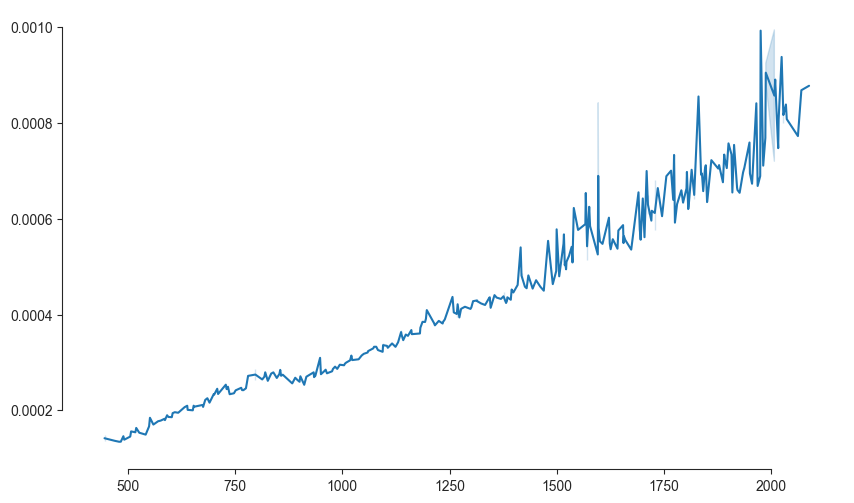

In [16]:
logx = [np.log(x) for x in xs]
logy = [np.log(y) for y in ys]

plt.figure(figsize=(10,6),dpi=100)
sns.set_style("ticks")
sns.lineplot(x=xs, y=ys)
sns.despine(offset=5,trim=True)

slope_jaccard,intercept, r_value, p_value ,std_err = scipy.stats.linregress(logx,logy)
print(slope_jaccard,intercept, r_value, p_value ,std_err)

# Cosine Similarity
## Dense Representations of the documents

In [17]:
documents = DocumentGenerator(length=100,filler_words=True,max_difference=True)
list_of_docs = documents.generate_documents(100,min_length=500,max_length=1000)



word_list = documents.total_words()

class DenseRepresentation: # import it into the class above
    def __init__(self,data: list):
        self.data = sorted(list(set(data)))
        self.list_of_dense_vectors = []
        
    def fill_vector(self,input_dict: dict):
        data_zero_vector = np.zeros(shape=(1,len(self.data)))
        for idx, word in enumerate(self.data):
            if word in input_dict.keys():
                data_zero_vector[0][idx] = input_dict[word]

        return data_zero_vector


    def dense_vector_generator(self,list_of_docs: list):
        list_of_dense_vectors = []

        for document_pair in list_of_docs:
            vector_pairs = []
            
            for j in document_pair:
                vector_pairs.append(self.fill_vector(input_dict = j))

            list_of_dense_vectors.append(vector_pairs)

        return list_of_dense_vectors



def dense_cosine_total(vector_pairs: list):
    for i in range(len(vector_pairs)):
        numerator = vector_pairs[i][0] @ vector_pairs[i][1].T
        denominator = np.linalg.norm(vector_pairs[i][0]) * np.linalg.norm(vector_pairs[i][1])

        print(numerator/denominator)


def dense_cosine(vector_1: np.array, vector_2: np.array):
    numerator = vector_1 @ vector_2.T
    denominator = np.linalg.norm(vector_1) * np.linalg.norm(vector_2)

    return numerator/denominator
        

DensRep = DenseRepresentation(word_list)
dense_vectors = DensRep.dense_vector_generator(list_of_docs=list_of_docs)


print(dense_vectors[0][1].shape)



# vector = DensRep.fill_vector(dict_1)
# vector2 = DensRep.fill_vector(dict_2)

# norm1 = np.linalg.norm(vector)
# norm2 = np.linalg.norm(vector)



# numerator = vector @ vector2.T
# print(numerator)
# denominator = norm1 * norm2


# numerator/denominator



2268
(1, 828)


In [ ]:
dense_cosine_total(dense_vectors)

In [ ]:
for i in range(len(dense_vectors)):
    ys.append(time_it(dense_cosine, dense_vectors[i][0],dense_vectors[i][1]))
    xs.append(max((np.sum(dense_vectors[i][0]),np.sum(dense_vectors[i][1]))))

logx = [np.log(x) for x in xs]
logy = [np.log(y) for y in ys]

plt.figure(figsize=(10,6),dpi=100)
sns.set_style("ticks")
sns.scatterplot(x=xs, y=ys)
sns.despine(offset=5,trim=True)

slope_cosine,intercept, r_value, p_value ,std_err = scipy.stats.linregress(logx,logy)
print(slope_jaccard,intercept, r_value, p_value ,std_err)

print(min(ys))

## Sparse Representation of the documents

In [ ]:
def cosine_dic(dic1,dic2):
    numerator = 0
    dena = 0
    for key1,val1 in dic1.items():
        numerator += val1*dic2.get(key1,0.0)
        dena += val1*val1
    denb = 0
    for val2 in dic2.values():
        denb += val2*val2
    return numerator/math.sqrt(dena*denb)

In [ ]:
for i in range(len(list_of_docs)):
    ys.append(time_it(cosine_dic, list_of_docs[i][0],list_of_docs[i][1]))
    xs.append(max((len(list_of_docs[i][0]),len(list_of_docs[i][1]))))

logx = [np.log(x) for x in xs]
logy = [np.log(y) for y in ys]


plt.figure(figsize=(10,6),dpi=100)
sns.set_style("ticks")
sns.lineplot(x=logx, y=logy)
sns.despine(offset=5,trim=True)




# plt.scatter(logx,logy)
slope_cosine,intercept, r_value, p_value ,std_err = scipy.stats.linregress(logx,logy)
print(slope_jaccard,intercept, r_value, p_value ,std_err)

# plt.show()

# Sparse Representation of the documents

In [ ]:
s = ['hello' ,'world']

In [ ]:
random.choices(s,k=1)[0]